In [32]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 


In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [6]:
# Import our dependencies and initialize counters and an empty list that will hold the weather data.
# Loop through the cities list.
# Group the cities in sets of 50 to log the process as we find the weather data for each city.
# Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
# Build the city_url or endpoint for each city.
# Log the URL and the record and set numbers.
# Make an API request for each city.
# Parse the JSON weather data for the following:
# City, country, and date
# Latitude and longitude
# Maximum temperature
# Humidity
# Cloudiness
# Wind speed
# Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f6c954fe44c6839fed8d7b04627a9ec


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
 # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   

Processing Record 1 of Set 13 | marsabit
Processing Record 2 of Set 13 | punta arenas
Processing Record 3 of Set 13 | east london
Processing Record 4 of Set 13 | jamestown
Processing Record 5 of Set 13 | nikolskoye
Processing Record 6 of Set 13 | port alfred
Processing Record 7 of Set 13 | geraldton
Processing Record 8 of Set 13 | birao
Processing Record 9 of Set 13 | ushuaia
Processing Record 10 of Set 13 | rikitea
Processing Record 11 of Set 13 | barrow
Processing Record 12 of Set 13 | vaini
Processing Record 13 of Set 13 | poum
Processing Record 14 of Set 13 | daru
Processing Record 15 of Set 13 | nanortalik
Processing Record 16 of Set 13 | jalu
Processing Record 17 of Set 13 | kerman
Processing Record 18 of Set 13 | jurm
Processing Record 19 of Set 13 | albany
Processing Record 20 of Set 13 | tsihombe
City not found. Skipping...
Processing Record 21 of Set 13 | chokurdakh
Processing Record 22 of Set 13 | souillac
Processing Record 23 of Set 13 | covington
Processing Record 24 of Se

Processing Record 35 of Set 16 | petropavlovka
Processing Record 36 of Set 16 | merta
Processing Record 37 of Set 16 | carlisle
Processing Record 38 of Set 16 | halifax
Processing Record 39 of Set 16 | bermejo
Processing Record 40 of Set 16 | moron
Processing Record 41 of Set 16 | port hardy
Processing Record 42 of Set 16 | kavaratti
Processing Record 43 of Set 16 | tuatapere
Processing Record 44 of Set 16 | saint-philippe
Processing Record 45 of Set 16 | rawson
Processing Record 46 of Set 16 | coquimbo
Processing Record 47 of Set 16 | dikson
Processing Record 48 of Set 16 | belushya guba
City not found. Skipping...
Processing Record 49 of Set 16 | vila velha
Processing Record 50 of Set 16 | inverness
Processing Record 1 of Set 17 | portoferraio
Processing Record 2 of Set 17 | minudasht
Processing Record 3 of Set 17 | katsuura
Processing Record 4 of Set 17 | meulaboh
Processing Record 5 of Set 17 | eyl
Processing Record 6 of Set 17 | concarneau
Processing Record 7 of Set 17 | kuala lip

Processing Record 24 of Set 20 | kytlym
City not found. Skipping...
Processing Record 25 of Set 20 | faanui
Processing Record 26 of Set 20 | meadow lake
Processing Record 27 of Set 20 | hirara
Processing Record 28 of Set 20 | las cruces
Processing Record 29 of Set 20 | osa
Processing Record 30 of Set 20 | gimli
Processing Record 31 of Set 20 | yuksekova
Processing Record 32 of Set 20 | huarmey
Processing Record 33 of Set 20 | pochutla
Processing Record 34 of Set 20 | tura
Processing Record 35 of Set 20 | jabiru
City not found. Skipping...
Processing Record 36 of Set 20 | petropavlovsk-kamchatskiy
Processing Record 37 of Set 20 | cadillac
Processing Record 38 of Set 20 | rehoboth
Processing Record 39 of Set 20 | taoudenni
Processing Record 40 of Set 20 | kalangala
Processing Record 41 of Set 20 | surgut
Processing Record 42 of Set 20 | keshan
City not found. Skipping...
Processing Record 43 of Set 20 | moroni
Processing Record 44 of Set 20 | havoysund
Processing Record 45 of Set 20 | na

Processing Record 9 of Set 24 | adrar
Processing Record 10 of Set 24 | sandnessjoen
Processing Record 11 of Set 24 | whitianga
Processing Record 12 of Set 24 | cavalcante
Processing Record 13 of Set 24 | kargopol
Processing Record 14 of Set 24 | rio grande
Processing Record 15 of Set 24 | payakumbuh
Processing Record 16 of Set 24 | bilibino
Processing Record 17 of Set 24 | vila franca do campo
Processing Record 18 of Set 24 | agua buena
Processing Record 19 of Set 24 | kutum
Processing Record 20 of Set 24 | sechura
Processing Record 21 of Set 24 | vitim
Processing Record 22 of Set 24 | tumannyy
City not found. Skipping...
Processing Record 23 of Set 24 | bowen
Processing Record 24 of Set 24 | boende
Processing Record 25 of Set 24 | naryan-mar
Processing Record 26 of Set 24 | kemijarvi
Processing Record 27 of Set 24 | vreed en hoop
City not found. Skipping...
Processing Record 28 of Set 24 | burica
City not found. Skipping...
Processing Record 29 of Set 24 | clarence town
Processing Rec

In [13]:
len(city_data)

555

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Marsabit,2.33,37.99,73.20,56,65,21.39,KE,2020-06-26 18:06:09
1,Punta Arenas,-53.15,-70.92,37.40,69,0,6.93,CL,2020-06-26 18:03:45
2,East London,-33.02,27.91,62.40,69,48,15.73,ZA,2020-06-26 18:06:09
3,Jamestown,42.10,-79.24,78.01,43,1,10.29,US,2020-06-26 18:06:09
4,Nikolskoye,59.70,30.79,77.00,44,0,6.71,RU,2020-06-26 18:03:47
5,Port Alfred,-33.59,26.89,60.01,71,24,5.01,ZA,2020-06-26 18:06:10
6,Geraldton,-28.77,114.60,57.20,93,75,10.29,AU,2020-06-26 18:06:10
7,Birao,10.28,22.79,78.58,63,36,7.83,CF,2020-06-26 18:06:10
8,Ushuaia,-54.80,-68.30,37.40,69,20,24.16,AR,2020-06-26 18:06:10
9,Rikitea,-23.12,-134.97,75.06,87,52,16.89,PF,2020-06-26 18:06:10


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Marsabit,KE,2020-06-26 18:06:09,2.33,37.99,73.20,56,65,21.39
1,Punta Arenas,CL,2020-06-26 18:03:45,-53.15,-70.92,37.40,69,0,6.93
2,East London,ZA,2020-06-26 18:06:09,-33.02,27.91,62.40,69,48,15.73
3,Jamestown,US,2020-06-26 18:06:09,42.10,-79.24,78.01,43,1,10.29
4,Nikolskoye,RU,2020-06-26 18:03:47,59.70,30.79,77.00,44,0,6.71
...,...,...,...,...,...,...,...,...,...
550,Houma,US,2020-06-26 18:07:30,29.60,-90.72,91.00,83,75,9.17
551,Lake City,US,2020-06-26 18:07:30,30.19,-82.64,93.99,52,1,3.36
552,Izvoarele,RO,2020-06-26 18:07:30,45.03,25.27,70.00,70,30,3.00
553,Namibe,AO,2020-06-26 18:07:30,-15.20,12.15,67.62,74,2,6.42


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1593194851.0956979

In [19]:
today = time.strftime("%x")
today

'06/26/20'

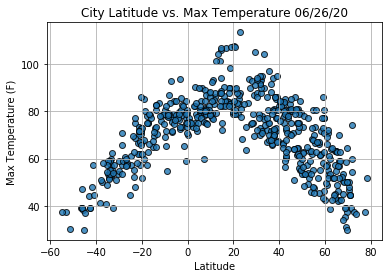

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

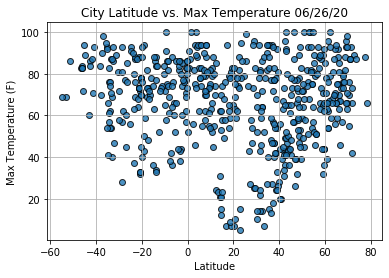

In [21]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

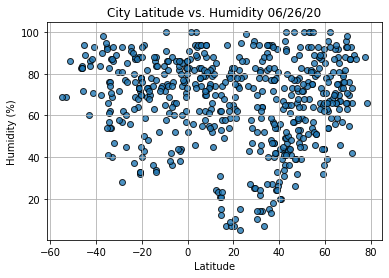

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

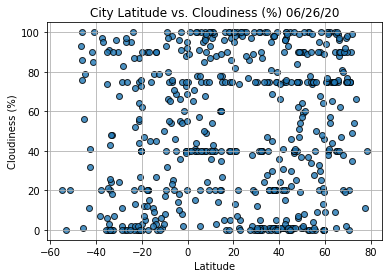

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

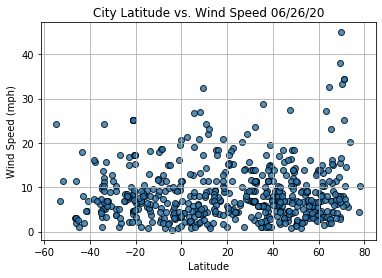

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [25]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [26]:
index13 = city_data_df.loc[13]
index13

City                         Daru
Country                        PG
Date          2020-06-26 18:06:11
Lat                         -9.08
Lng                        143.21
Max Temp                    78.12
Humidity                       86
Cloudiness                    100
Wind Speed                  18.68
Name: 13, dtype: object

In [27]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3       True
4       True
       ...  
550     True
551     True
552     True
553    False
554     True
Name: Lat, Length: 555, dtype: bool

In [28]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Marsabit,KE,2020-06-26 18:06:09,2.33,37.99,73.20,56,65,21.39
3,Jamestown,US,2020-06-26 18:06:09,42.10,-79.24,78.01,43,1,10.29
4,Nikolskoye,RU,2020-06-26 18:03:47,59.70,30.79,77.00,44,0,6.71
7,Birao,CF,2020-06-26 18:06:10,10.28,22.79,78.58,63,36,7.83
10,Barrow,US,2020-06-26 18:06:10,71.29,-156.79,39.20,93,90,10.29
...,...,...,...,...,...,...,...,...,...
549,Zapolyarnyy,RU,2020-06-26 18:07:30,69.42,30.81,50.00,71,75,38.03
550,Houma,US,2020-06-26 18:07:30,29.60,-90.72,91.00,83,75,9.17
551,Lake City,US,2020-06-26 18:07:30,30.19,-82.64,93.99,52,1,3.36
552,Izvoarele,RO,2020-06-26 18:07:30,45.03,25.27,70.00,70,30,3.00


In [29]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Marsabit,KE,2020-06-26 18:06:09,2.33,37.99,73.20,56,65,21.39
3,Jamestown,US,2020-06-26 18:06:09,42.10,-79.24,78.01,43,1,10.29
4,Nikolskoye,RU,2020-06-26 18:03:47,59.70,30.79,77.00,44,0,6.71
7,Birao,CF,2020-06-26 18:06:10,10.28,22.79,78.58,63,36,7.83
10,Barrow,US,2020-06-26 18:06:10,71.29,-156.79,39.20,93,90,10.29


In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

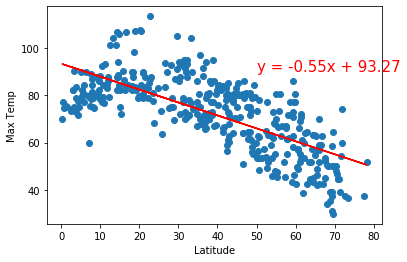

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(50, 90))                                                                   

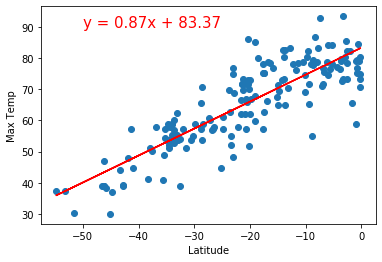

In [34]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

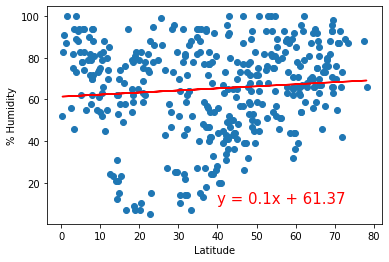

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

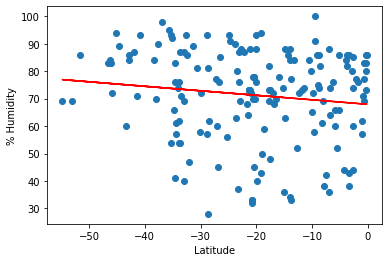

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

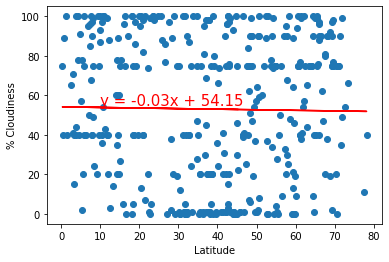

In [37]:
## 6.4.4 Refactor the code we have been using for linear regression lines and plots to create the x- and y-values for the percent cloudiness and latitudes on the Northern Hemisphere DataFrame.
## Call the plot_linear_regression function with the correct arguments to create the linear regression line and plot for percent cloudiness in the Northern Hemisphere. It should look like the following plot.  

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(10,55))

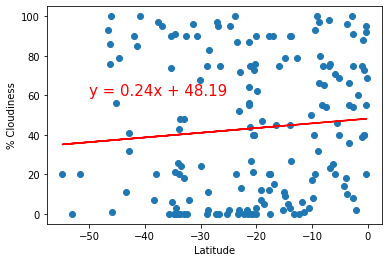

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

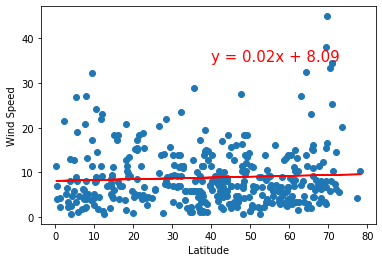

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

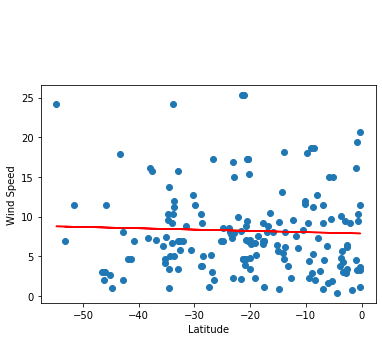

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))
